In [1]:
import pandas as pd
import numpy as np
import os
import json
import cv2
import random
import sklearn
import pydot
import tqdm
import datetime

from matplotlib import image as mpimg
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import yaml
import torch
from pathlib import Path
import random

import ultralytics
from ultralytics import YOLO

In [2]:
ultralytics.checks()

Ultralytics YOLOv8.0.210  Python-3.11.3 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)
Setup complete  (12 CPUs, 15.9 GB RAM, 290.9/446.5 GB disk)


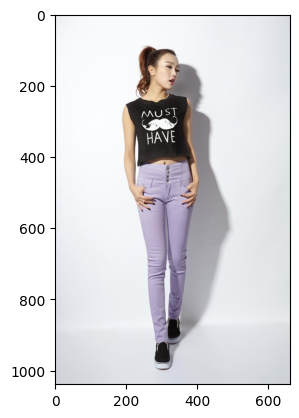

In [3]:
#Test if disk F: can be read
#If not please disconnect then reconnect Disk F:
img_id = "034902"

image = mpimg.imread(f"D:/Benji/deepfashion2_dataset/train/image/{img_id}.jpg")
plt.imshow(image)
plt.show()

In [ ]:
model = YOLO('yolov8n.pt')
results = model.train(
    data='D:/Benji/yaml/deepfashion2.yaml', 
    epochs=50, 
    batch=32, 
    patience=40, 
    device=0, 
    cls=0.4, 
    dfl=1.0, 
    pretrained=False,
    close_mosaic=0,
    name="2023-11-24-50epchs-nopre",
    optimizer='RMSProp')

New https://pypi.org/project/ultralytics/8.0.216 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.210  Python-3.11.3 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/Benji/yaml/deepfashion2.yaml, epochs=50, patience=40, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=2023-11-24-50epchs-nopre, exist_ok=False, pretrained=False, optimizer=RMSProp, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=

In [ ]:
results = model.val(plots=True)